In [6]:
#Dependencies and setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sts
import time
import json
import requests

#Import API key 
from config import apikey as weather_api_key

#Import citipy to determine city based on latitude and longitude
from citipy import citipy

#Prep csv filepath and file for program output
output_data_file = "output_data/cities.csv"

#Establish the range for latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)


weather_api_key

'89d9da8fa5efd4fd3eff255699a26c79'

In [7]:
#Generate the list of cities for evaluation

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [8]:
# Establishing the structures for the API Call 
# Goals: use an API call (lat_lng or by city name that makes a call to open weather)
# Try and see if the API has that data, if not move on [Try/Except]
# Use a loop to do all of this for each city you generated above

api_cities = []
country = []
date = []
max_temp = []
humidity = []
clouds = []
windspeed = []
api_lat = []
api_lon = []

url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Beginning Data Retrieval")
print("-------------------------------------")

for cityname in cities: 
    
    try:
        query_url = (url + cityname + "&units=imperial" + "&appid=" + weather_api_key)
        json_weather = requests.get(query_url).json()
        
        api_cities.append(json_weather["name"])
        country.append(json_weather["sys"]["country"])
        date.append(json_weather["dt"])
        max_temp.append(json_weather["main"]["temp_max"])
        humidity.append(json_weather["main"]["humidity"])
        clouds.append(json_weather["clouds"]["all"])
        windspeed.append(json_weather["wind"]["speed"])
        api_lat.append(json_weather["coord"]["lat"])
        api_lon.append(json_weather["coord"]["lon"])
        
        print(f"Processing Record {cities.index(cityname)} | {cityname}")
        
    except: 
        print(f"Record request {cities.index(cityname)} could not be found in OpenWeather Database.")
        print(f"Loading next record...")
        pass

print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")


Beginning Data Retrieval
-------------------------------------
Processing Record 0 | bredasdorp
Processing Record 1 | east london
Processing Record 2 | tuktoyaktuk
Processing Record 3 | punta arenas
Processing Record 4 | avarua
Processing Record 5 | salalah
Record request 6 could not be found in OpenWeather Database.
Loading next record...
Processing Record 7 | hobart
Processing Record 8 | port alfred
Processing Record 9 | constitucion
Processing Record 10 | atuona
Processing Record 11 | vila velha
Processing Record 12 | garelochhead
Processing Record 13 | thompson
Processing Record 14 | flinders
Processing Record 15 | chokurdakh
Processing Record 16 | komsomolskiy
Processing Record 17 | rikitea
Processing Record 18 | busselton
Processing Record 19 | bubaque
Processing Record 20 | ahipara
Processing Record 21 | sisimiut
Processing Record 22 | itaguai
Processing Record 23 | shakawe
Processing Record 24 | bethel
Record request 25 could not be found in OpenWeather Database.
Loading next r

Processing Record 222 | pemangkat
Processing Record 223 | semporna
Processing Record 224 | sinnamary
Processing Record 225 | ahuimanu
Processing Record 226 | hofn
Processing Record 227 | avera
Processing Record 228 | eyl
Processing Record 229 | warrnambool
Processing Record 230 | imamoglu
Processing Record 231 | kasangulu
Processing Record 232 | turukhansk
Processing Record 233 | kruisfontein
Processing Record 234 | alofi
Processing Record 235 | jati
Processing Record 236 | ucluelet
Processing Record 237 | sitka
Processing Record 238 | arraial do cabo
Processing Record 239 | college
Processing Record 240 | llangefni
Processing Record 241 | moroni
Processing Record 242 | mosquera
Processing Record 243 | kaka
Processing Record 244 | san juan
Record request 245 could not be found in OpenWeather Database.
Loading next record...
Processing Record 246 | kenai
Processing Record 247 | kholm-zhirkovskiy
Processing Record 248 | haines junction
Processing Record 249 | brae
Processing Record 250 |

Processing Record 439 | fortuna
Processing Record 440 | rawah
Processing Record 441 | port hardy
Processing Record 442 | letlhakane
Processing Record 443 | hovd
Processing Record 444 | san juan bautista
Processing Record 445 | tommot
Processing Record 446 | waslala
Processing Record 447 | northam
Processing Record 448 | marsta
Processing Record 449 | buchanan
Processing Record 450 | soe
Processing Record 451 | tahoua
Processing Record 452 | tieling
Processing Record 453 | cabo san lucas
Processing Record 454 | vao
Processing Record 455 | ambilobe
Processing Record 456 | wanning
Record request 457 could not be found in OpenWeather Database.
Loading next record...
Processing Record 458 | quelimane
Processing Record 459 | marienburg
Processing Record 460 | kupang
Processing Record 461 | nyurba
Processing Record 462 | wewak
Processing Record 463 | borovoy
Processing Record 464 | fort nelson
Processing Record 465 | lahaina
Processing Record 466 | hue
Processing Record 467 | bonfim
Processin

In [10]:
#Converting raw data into a dataframe 

weather_dict = {
    
    "City": api_cities, 
    "Latitude": api_lat, 
    "Longitude": api_lon, 
    "Maxium Temperature (F)": max_temp, 
    "Humidity (%)": humidity, 
    "Cloudiness (%)": clouds, 
    "Wind Speed (mph)": windspeed,
    "Country": country, 
    "Date": date
    
}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Maxium Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Bredasdorp,-34.5322,20.0403,57.20,88,100,3.44,ZA,1619371781
1,East London,-33.0153,27.9116,68.00,83,0,9.22,ZA,1619371782
2,Tuktoyaktuk,69.4541,-133.0374,10.40,85,90,10.36,CA,1619371782
3,Punta Arenas,-53.1500,-70.9167,59.00,47,75,23.02,CL,1619371495
4,Avarua,-21.2078,-159.7750,78.80,83,75,10.36,CK,1619371695
...,...,...,...,...,...,...,...,...,...
595,Urusha,54.0500,122.9000,36.57,73,100,0.92,RU,1619371971
596,Le Port,-20.9373,55.2919,75.20,88,90,18.41,RE,1619371732
597,Soria,41.6667,-2.6667,50.00,90,100,1.01,ES,1619371972
598,Kamakwie,9.5000,-12.2333,99.99,22,52,4.56,SL,1619371931


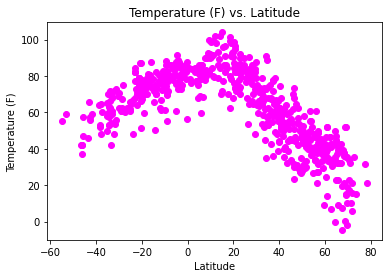

This plot analyzes shifts in temperature (F) as the degrees of latitude changes from -90 to 90 degrees. Temperature appears to increase as you approach 0 degrees of latitude


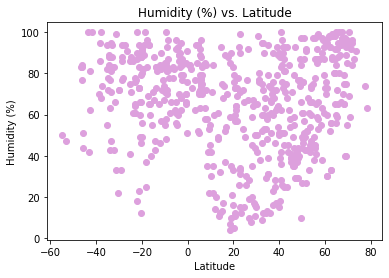

This plot analyzes shifts in humidity (%) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


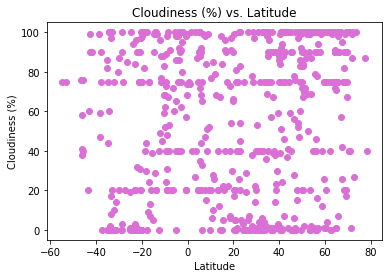

This plot analyzes shifts in cloudiness (%) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


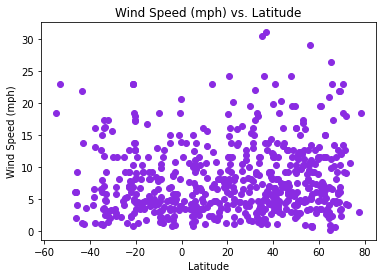

This plot analyzes shifts in wind Speed (mph) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


In [21]:
# Generating scatter plots for the following: 
# Temperature (F) vs. Latitude 
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# Temp vs. Lat

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(weather_df["Latitude"], weather_df["Maxium Temperature (F)"], marker="o", color="magenta")
plt.show()
print("This plot analyzes shifts in temperature (F) as the degrees of",
      "latitude changes from -90 to 90 degrees. Temperature appears to", 
      "increase as you approach",
      "0 degrees of latitude")


plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker="o", color="plum")
plt.show()
print("This plot analyzes shifts in humidity (%) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], marker="o", color="orchid")
plt.show()

print("This plot analyzes shifts in cloudiness (%) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], marker="o", color="blueviolet")
plt.show()

print("This plot analyzes shifts in wind Speed (mph) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")



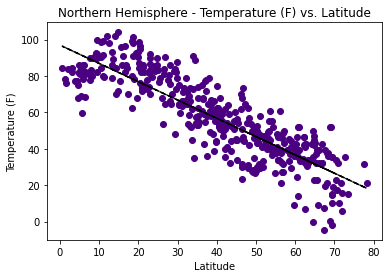

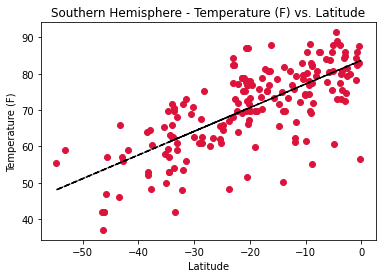

In [57]:
bins = [-90, 0, 90]
bin_names = ["Southern Hemisphere", "Northern Hemisphere"]
weather_df["Hemisphere"]  = pd.cut(weather_df["Latitude"], bins, labels=bin_names, include_lowest=True)


nhem_df = weather_df.loc[weather_df["Hemisphere"] == "Northern Hemisphere", :].reset_index(drop=True)
shem_df = weather_df.loc[weather_df["Hemisphere"] == "Southern Hemisphere", :].reset_index(drop=True)

# fig, (ax1, ax2) = plt.subplots(2, sharex=False)
# fig.suptitle("Temperature (F) vs. Latitude", fontsize=16, fontweight="bold")

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(nhem_df["Latitude"], nhem_df["Maxium Temperature (F)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Maxium Temperature (F)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.show()

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(shem_df["Latitude"], shem_df["Maxium Temperature (F)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Maxium Temperature (F)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.show()



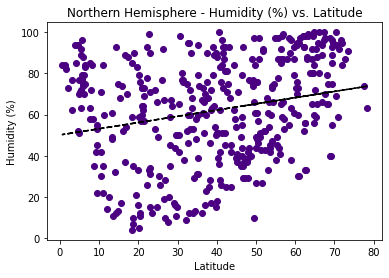

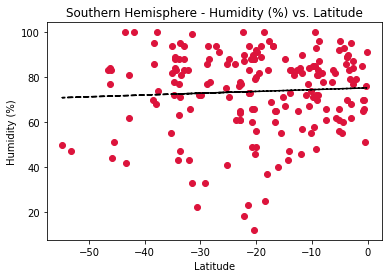

In [58]:

# fig, (ax1, ax2) = plt.subplots(2, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(nhem_df["Latitude"], nhem_df["Humidity (%)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Humidity (%)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.show()


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(shem_df["Latitude"], shem_df["Humidity (%)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Humidity (%)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.show()


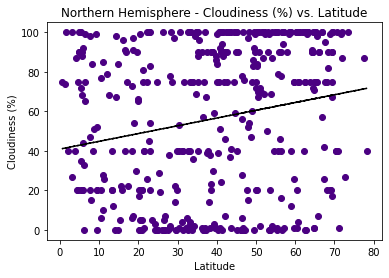

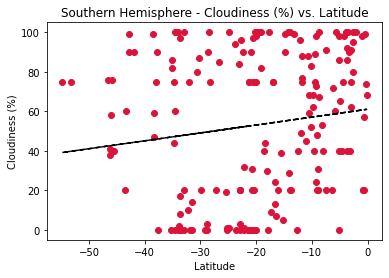

In [66]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(nhem_df["Latitude"], nhem_df["Cloudiness (%)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Cloudiness (%)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.show()


plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(shem_df["Latitude"], shem_df["Cloudiness (%)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Cloudiness (%)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.show()



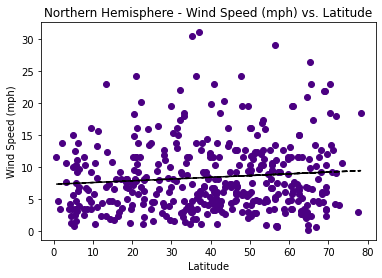

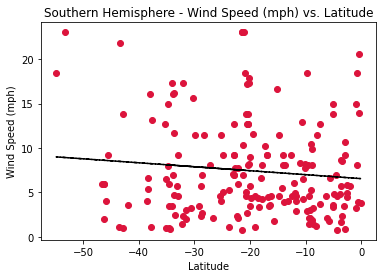

In [67]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(nhem_df["Latitude"], nhem_df["Wind Speed (mph)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Wind Speed (mph)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.show()


plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(shem_df["Latitude"], shem_df["Wind Speed (mph)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Wind Speed (mph)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.show()

In [69]:
#Print dataframe to a CSV file 

weather_df.to_csv(output_data_file, index=False, header=True)